## Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек
Выполнила студентка гр. 9381 Москаленко Елизавета, вариант 55.

### Цель работы
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

### Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

### Основные теоритические положения

#### Бинарный метод возведения числа в степень
Бинарное (двоичное) возведение в степень — это приём, позволяющий возводить любое число в $n$-ую степень за $O(log(n))$ умножений (вместо $n$ умножений при обычном подходе).

Запишем $n$ в двоичной системе счисления и заменим в этой записи каждую цифру “1” парой букв $SX$, а каждую цифру “0” – буквой $S$, после чего вычеркнем крайнюю левую пару букв $SX$. Результат, читаемый слева на право, превращается в правило вычисления $x^{n}$, если букву “S” интерпретировать как операцию возведения в квадрат ($S$ – square – квадрат), а букву “$X$ ” – как операцию умножения на $х$.

#### Метод множителей
Если $n=p·q$, где $р$ – наименьший простой множитель числа $n$ и $q > 1 $, то для вычисления $x^{n}$ мы можем сначала вычислить $x^{p}$, а затем возвести это число в степень $q$. В случае, когда n простое, мы можем вычислить сначала число $x^{n-1}$, а затем умножить его на $х$.

Если $n=1$, число $x^{n}$ имеется без всяких вычислений. Многократное применение этих правил дает нам процедуру вычисления $x^{n}$ для любого данного $n$.

#### Аддитивная цепочка
Аддитивной цепочкой для числа $n$ называется любая начинающаяся с 1 последовательность натуральных чисел $a_{0} = 1, a_{1},..., a_{m} = n$, в которой каждое число является суммой каких-то двух предыдущих чисел (возможно совпадающих), то есть для всех $i \geqslant 1$ выполнено равенство $n = a_{j} + a_{k}$, $j,k < i$. Под длиной цепочки $a_{0}, a_{1}, ... , a_{m}$ понимается число $m$. Через $l(n)$ обозначим длину кратчайшей аддитивной цепочки для $n$.

####  Алгоритм Брауэра
Метод Брауэра позволяет по заданной линейной цепочке $a_{0} = 1, a_{1},..., a_{m} = n$ построить аддитивную цепочку для $2^{n-1}$.

$$\begin{equation*}
B_{k}(n) = 
 \begin{cases}
       1, 2, 3,... 2^{k}- 1  &\text{if n $< 2^{k}$}\\
   B_{k}(q), 2q, 4q, ..., 2^{k}q, n &\text{if $n \geqslant 2^{k}$ and $q = [\frac{n}{2^{k}}]$}
 \end{cases}
\end{equation*} $$

#### Алгоритм дробления вектора индексов
Звёздная цепочка - это аддитивная цепочка, в которой текущий элемент получен сложением предыдущего и какого-то $a_j$, где $a_i=a_{i-1}+a_j$ при $0 \leq k \leq i-1$.
###### Данный алгоритм находит минимальную звёздную цепочку для числа $n$. 
Пусть $l^{*}(n) = m$ - звёздная цепочка.  $\{ a_i \}_{i=1}^{m}$, $a_1$ = 1, тогда вектор индексов: $\{ r_i \}_{i=1}^{m-1}$, где $r_i = \{x: 1 \leqslant x \leqslant i\}$.

Тогда шаг звёздной цепочки: ${a_i}$ = ${a}_{i-1}$ + ${a}_{{r}_{i-1}}$, 2  $\leqslant  i  \leqslant  m$.

Наибольшая звездная цепочка: $S_{max}=\{1, 2, 4, \dots, 2^m\} <=>$ вектор индексов $r_{max} = \{1, 2, 3, \dots, m\}$
Наименьшая звездная цепочка: $S_{min}=\{1,2,3,\dots , m\} <=>$ вектор индексов $r_{min}=\{1, 1, 1, \dots, 1\}$

Пусть $r=\{ r_i \}_{i=1}^{m}$ больше $\tilde{r}=\{ \tilde{r}_i \}_{i=1}^{m}$ если $r_1=\tilde{r}_1; r_2=\tilde{r}_2; \dots; r_{i-1}=\tilde{r}_{i-1};r_i>\tilde{r}_i$

Нахождение минимальной аддитивной цепочки осуществляется с помощью перебора. Каждый вектор индексов разбивать на два: $r=\{ r_i \}_{i=1}^{q}$ - фиксированный вектор, $\rho=\{ \rho_j \}_{j=q+1}^{m}$ - меняющийся вектор. Для фиксированного вектора можно вычислить максимальное и минимальное значение аддитивной цепочки:
$$ a_{max}: \{ r_i \}_{i=1}^{q} \cup \{ q+1, q+2, \dots, m \} => a_{max} = a_{q+1} \cdot 2^{m-q}\\
a_{min}: \{ r_i \}_{i=1}^{q} \cup \{ 1, 1, \dots, 1 \} => a_{min}=a_{q+1}+m-q $$

##### Описание алгоритма
Текущий вектор индексов разбивается на два: фиксированный и изменющийся. Для фиксированной части вычисляются $a_{max}$ и $a_{min}$. Если $n \notin [a_{min}, a_{max}]$, то осуществляется переход к следующему фиксированному вектору(в сторону уменьшения или увеличения), иначе существляется перебор по меняющемуся вектору. Если для заданной длины не нашлось аддитивной цепочки, то необходимо увеличить длину аддитивной цепочки. 

* Длина аддитивной цепочки: $m \in [\underline{l}(n), \overline{l}(n)]$, где $\underline{l}(n)=\lceil log_2 n \rceil,\, \overline{l}(n)=\lambda(n)+\nu(n)-1$

#### Теорема Брауэра
При некотором $k < lb(lb(n))$ справедливо $l(n) < (1 + k^{-1})\lceil lb n \rceil + 2^{k-1} - k + 2$.

Следствие 1. Если $k = \lambda(\lambda(n)) - 2*\lambda(\lambda(\lambda(n)))$, то $\lim_{n \to \infty} \frac{l(n)}{\lambda(n)} = 1$  
$ \lambda(n)$ - уменьшенная на 1 длина бинарной записи числа $n$  

#### Гипотеза Шольца-Брауэра 
Для звёздной цепочки:  
$l ^ * (2 ^  n- 1) \leq l ^ * (n) + n - 1$

## Порядок выполнения работы
1. Применить бинарный метод и метод множителей для $x^n$, где $n \geqslant 30$, для 2-3 значений n (значения n выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.

2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.

3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n>500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.

4. Проверить следствие 1 теоремы Брауэра для $n=1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.

5. Проверить гипотезу Шольца–Брауэра для $1 < n\leqslant 10$ на алгоритме дробления вектора индексов. Сделать выводы.

6. Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.


### Бинарный метод и метод множителей
Реализованы ниже. Вывод под алгоритмами.

In [2]:
def binary(number, power):
    countOperations = 0
    currentNumber = number
    
    for digit in bin(power)[3:].replace('0', '2'):
        if digit == '1':
            currentNumber *= currentNumber
            currentNumber *= number
            countOperations += 2
        if digit == '2':
            currentNumber *= currentNumber
            countOperations += 1
            
    return [currentNumber, countOperations]

In [3]:
def multiplier(x, n):
    F = factor(n)
    if F[0][0] == n:
        res = binary(x, n-1)
        res[0] = res[0] * x
        res[1] = res[1] + 1
        return res
    a = binary(x, F[0][0])
    b = binary(a[0], n // F[0][0])
    return b[0], a[1] + b[1]

In [4]:
import time
number, power = 13, 16
result1 = binary(number, power)
result2 = multiplier(number, power)

print("Binary method. Operations pow(",number, power, "):", result1[1])
print("Multiplier method. Operations pow(",number, power, "):", result2[1])
print('\n')

number, power = 45, 777
result1 = binary(number, power)
result2 = multiplier(number, power)

print("Binary method. Operations pow(",number, power, "):", result1[1])
print("Multiplier method. Operations pow(",number, power, "):", result2[1])
print('\n')

number, power = 30, 63
result1 = binary(number, power)
result2 = multiplier(number, power)

print("Binary method. Operations pow(",number, power, "):", result1[1])
print("Multiplier method. Operations pow(",number, power, "):", result2[1])
print('\n')

number, power = 85, 1015
result1 = binary(number, power)
result2 = multiplier(number, power)

print("Binary method. Operations pow(",number, power, "):", result1[1])
print("Multiplier method. Operations pow(",number, power, "):", result2[1])
print('\n')

number, power = 63, 1023
result1 = binary(number, power)
result2 = multiplier(number, power)

print("Binary method. Operations pow(",number, power, "):", result1[1])
print("Multiplier method. Operations pow(",number, power, "):", result2[1])
print('\n')

number, power = 63, 46
result1 = binary(number, power)
result2 = multiplier(number, power)

print("Binary method. Operations pow(",number, power, "):", result1[1])
print("Multiplier method. Operations pow(",number, power, "):", result2[1])
print('\n')

('Binary method. Operations pow(', 13, 16, '):', 4)
('Multiplier method. Operations pow(', 13, 16, '):', 4)


('Binary method. Operations pow(', 45, 777, '):', 12)
('Multiplier method. Operations pow(', 45, 777, '):', 12)


('Binary method. Operations pow(', 30, 63, '):', 10)
('Multiplier method. Operations pow(', 30, 63, '):', 8)


('Binary method. Operations pow(', 85, 1015, '):', 17)
('Multiplier method. Operations pow(', 85, 1015, '):', 14)


('Binary method. Operations pow(', 63, 1023, '):', 18)
('Multiplier method. Operations pow(', 63, 1023, '):', 14)


('Binary method. Operations pow(', 63, 46, '):', 8)
('Multiplier method. Operations pow(', 63, 46, '):', 8)




Binary method. Operations pow( 13, 16):  4
Multiplier method. Operations pow( 13, 16):  4


Binary method. Operations pow( 45, 777 ): 12
Multiplier method. Operations pow( 45, 777):  12


Binary method. Operations pow( 30, 63 ):  10
Multiplier method. Operations pow( 30, 63 ): 8


Binary method. Operations pow( 85, 1015 ): 17
Multiplier method. Operations pow( 85, 1015):  14


Binary method. Operations pow( 63, 1023 ):  18
Multiplier method. Operations pow( 63, 1023 ):  14

('Binary method. Operations pow(', 63, 46, '):', 8)
('Multiplier method. Operations pow(', 63, 46, '):', 8)


Бинарный метод для n = 46:   
$n = {101110}_2$  
SxSSxSxSxS  
$x^2x^4x^5x^{10}x^{11}x^{22}x^{23}x^{46}$   
Всего 8 умножений.

Метод множителей для n = 46:   
p = 2  
q = 23  
p = $10_2$, КУУ  
y = $x^2$  
$y^23$ = ...  
Дальше действия как в бинарном методе. Всего 8 умножений.

Бинарный метод для n = 63:  
$n = 111111_2$  
SxSxSxSxSxSx  
$x^2x^3x^6x^7x^{14}x^{15}x^{30}x^{31}x^{32}x^{63}$
Всего 10 умножений.

Метод множителей для n = 63:  
p = 3  
q = 21  
y = $x^3 = x^2*x$  
$y^21  = y^2y^4y^5y^{10}y^{20}y^{21}$
Всего 8 умножений.

#### Вывод:
Исследование показало, что при маленьких числах количество операций методов бинарного и множителей примерно одинаковое. В общем случае наиболее оптимальным является метод множителей. При $n=2^k+1$, где $k\in \mathbb{N}$, бинарный метод делает не больше операций, чем метод множителей.

### Алгоритм Брауэра
Реализация представлена ниже.

In [2]:
def brauer(n, k):
    list_of_mods = []
    power = 2 ** k
    check = n
    while check >= power:
        list_of_mods.append(check % power)
        check //= power

    list_of_mods.append(check)
    list_of_mods.reverse()
    current_power = 0
    x = 1
    chain = []
    chain.append(x)
    while (x != list_of_mods[current_power]):
        x += 1
        chain.append(x)

    while (x != n):
        pow2 = 0
        while (pow2 != k):
            pow2 += 1
            x *= 2
            chain.append(x)
        current_power += 1
        x += list_of_mods[current_power]
        chain.append(x)
    return chain


chain = sorted(list(set(brauer(int(input("Enter n: ")), int(input("Enter k: "))))))
print("The length: ", len(chain))
print("The Brauer chain: ", chain)

Enter n: 5
Enter k: 2
('The length: ', 4)
('The Brauer chain: ', [1, 2, 4, 5])


| Значение n | Значение k | Полученная длина | Длина минимальной цепочки | 
| :-: | :-: | :-: | :-: |  :-: |
| 27182 | 3 | 21 | 19 | [1, 2, 3, 4, 5, 6, 12, 24, 48, 53, 106, 212, 424, 848, 1696, 3392, 3397, 6794, 13588, 27176, 27182] |
|  13 | 2 |  6| 6 | [1, 2, 3, 6, 12, 13] |
| 16183 | 5 | 27 | 19 | [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 30, 60, 120, 240, 480, 505, 1010, 2020, 4040, 8080, 16160, 16183] |



#### Вывод: 
Алгоритм выдаёт минимальную цепочку только для небольших чисел при $k = \lambda(\lambda(n))$. С ростом $n$ длина цепочки Брауэра будет расти относительно минимальной, так как количество элементов увеличивается до $2^{k}$. Можно сделать вывод, что данный алгоритм эффективен только в некоторых случаях.

### Алгоритм дробления вектора индексов
Реализован ниже.

In [14]:
import time
import math


def findIndexForVector(vector, index0=1):
    maxIndex = index0 + len(vector) - 1
    for i in range(1, len(vector) + 1):
        vector[-i] += 1
        if vector[-i] <= maxIndex:
            break
        if i == len(vector):
            vector.append(1)
            break
        vector[-i] = 1
        maxIndex -= 1


def getNewChainUsingIndex(r_i):
    add_chain = [1]

    for index in r_i:
        add_chain.append(add_chain[-1] + add_chain[index - 1])

    return add_chain


def splittingIndexVector(n):
    lower = int(log(n, 2))
    upper = lower + bin(n).count('1') - 1

    while lower <= upper:
        q = int(lower / 2)
        if q == 0:
            q = 1
        listR = [1 for i in range(q)]

        while len(listR) == q:
            listRo = [1 for i in range(lower - q)]

            chain = getNewChainUsingIndex(listR + listRo)
            if chain[-1] == n:
                return chain

            aMax = chain[q] * 2 ** (lower - q)
            aMin = chain[q] + lower - q

            if aMin > n or aMax < n:
                findIndexForVector(listR)
                continue

            while len(listRo) == lower - q:
                chain = getNewChainUsingIndex(listR + listRo)
                if chain[-1] == n:
                    return chain
                findIndexForVector(listRo, q + 1)
            findIndexForVector(listR)
        lower += 1
    return chain


n = int(input("Enter N: "))
start = time.time()
chain = splittingIndexVector(n)
finish = time.time()
print("Star addition chain:", chain)
print("Length of addition chain:", len(chain))
print("Total work time: ", float(finish - start), "seconds")

Enter N: 15
('Star addition chain:', [1, 2, 3, 5, 10, 15])
('Length of addition chain:', 6)
('Total work time: ', 0.017323017120361328, 'seconds')


| Значение n | Значение k | Длина цепочки алгоритма Брауэра | Время работы а. Брауэра   |Длина цепочки а. дробления  | Время работы а. дробления | Время работы бинарного метода | Время работы метода множителей |
| :-: | :-: | :-: | :-: | :-: |  :-: | :-: | :-: |
| 513 | 3 | 11 | 2.0976409912109375 | 11| 4.37620997428894 | 9.60826873779e-05 | 0.000133037567139 |
| 600 | 2 | 13 |  2.388014078140259| 12 | 60.928571939468384| 0.000108957290649 | 9.70363616943e-05 |
| 704 | 3 | 11 | 4.85647177696228 | 12 | 6.4909868240356445 | 6.91413879395e-05 | 0.000144004821777 |
| 801 | 3 | 13 | 2.774775981903076 | 13 | 1083.378122806549 | 8.48770141602e-05 | 0.000138998031616 |


#### Вывод: 
Алгоритм дробления вектора индексов оказался самым неэффективным по времени, и время поиска растет с увеличением параметра $n$. Однако по сравнению с алгоритмом Брауэра он дает результат, близкий к идеальному. Так же довольно эффективен метод множителей, он работает быстрее бинарного. Итак, 
* Метод дробления вектора индексов эффективен по результату, но не по времени
* Метод Бауэра и метод множителей эффективны по времени, но не всегда по результату



### Проверка следствия теоремы Брауэра

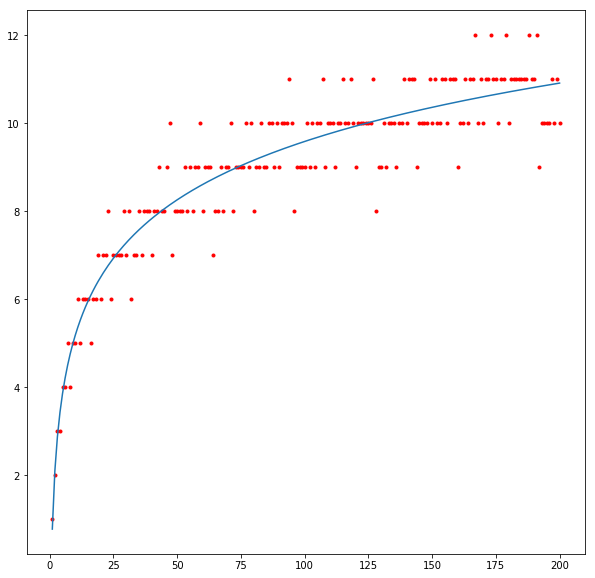

In [3]:
import pylab as plt

def minLengthChains(n):
    lens = []
    for i in range(2, n + 1):
        q = factor(i)[0][0]
        if n in [19, 43, 59, 83, 107, 149, 163, 165, 170, 179, 191, 205]:
            sigma = 1
        else:
            sigma = 0
        if q == i:
            l.append(lens[-1] + 1 - sigma)
        else:
            l.append(min(lens[-1] + 1, lens[q - 1] + lens[i/q - 1]) - sigma)
    return [i + 1 for i in range(i)], [i + 1 for i in lens]

def approximate(x, y):
    m = matrix([[sum([float((log(i))**2) for i in x]),
                 sum([float(log(i)) for i in x])],
                [sum([float(log(i)) for i in x]), len(x)]])
    vector1 = vector([sum([float(y[i] * log(x[i])) for i in range(len(x))]), sum(y)])
    answer = m.solve_right(vector1)
    plt.plot(x, [answer[0] * log(i) + answer[1] for i in x])
    
plt.figure(figsize = (10, 10))
x, y = minLengthChains(200)
plt.scatter(x, y, color='r', marker='.')
approximate(x, y)
plt.show()

#### Вывод: 

Как видно, аппроксимирующая прямая $l(n)$ схожа с графиком логарифма. Это подтвержает следствие теоремы Брауэра, поскольку в этом случае на бесконечности $\lambda(n)$ и $l(n)$ будут эквивалентны.

### Проверка гипотезы Шольца-Брауэра  от 2 до 10
$l ^ * (2 ^  n- 1) \leq l ^ * (n) + n - 1$

In [23]:
for i in range(2, 11):
    a = len(splittingIndexVector(2 ** i -  1))
    b = len(splittingIndexVector(i)) + i - 1
    if (a <= b):
        print("n = ", i, ':', a, " <= ", b )
    else:
        print("n = ", i, ':', a, " > ", b )

('n = ', 2, ':', 3, ' <= ', 3)  
('n = ', 3, ':', 5, ' <= ', 5)  
('n = ', 4, ':', 6, ' <= ', 6)  
('n = ', 5, ':', 8, ' <= ', 8)  
('n = ', 6, ':', 9, ' <= ', 9)  
('n = ', 7, ':', 11, ' <= ', 11)  
('n = ', 8, ':', 11, ' <= ', 11)  
('n = ', 9, ':', 13, ' <= ', 13)  
('n = ', 10, ':', 14, ' <= ', 14)  

| Значение n |$l ^ * (2 ^  n- 1)$ | $l ^ * (n) + n - 1$ |
| :-: | :-: | :-: |
|2 | 3 |  3| 
|3 | 5 | 5 | 
|4 | 6 | 6 | 
|5 | 8 | 8 |
|6 | 9 | 9 | 
|7 | 11 | 11 | 
|8 | 11 | 11 | 
|9 | 13 | 13 |
|10 | 14 | 14|

Выводы:
Гипотеза Шольца-Брауэра верна для $n \leq 10$. Эта гипотеза позволяет найти аддитивную цепочку для $n= {2}^k-1$, где $k \in N$ методом дробления вектора индексов быстрее, так как будет известная примерная длина цепоки. Но программа все равно работает ужасно медленно.

###  Выводы по работе

В ходе выполнения практической работы были сформированы представления об аддитивных цепочках, получен навык использования систем компьютерной алгебры для реализации алгоритмов. Были реализованы и проанализированы следующие методы: 
* бинарный метод 
* метод множителей
* метод Брауэра 
* метод дробления вектора индексов.   
Исследование показало, что метод множителей в большинстве случаев проигрывает в скорости бинарному, а метод дробления вектора индексов дает более точный результат по сравнению с методом Брауэра, но работает НАМНОГО медленнее.
Так же было проверено следствие 1 теоремы Брауэра $\lim_{n \to \infty} \frac{l(n)}{\lambda(n)} = 1$ и гипотеза Шольца-Брауэра $l ^ * (2 ^  n- 1) \leq l ^ * (n) + n - 1$ для $n$ от 1 до 10 на алгоритме дробления вектора индексов. И следствие, и гипотеза оказались верными.